# Airline On-Time Performance Data Exploration
## by Ahmed Awwad


## Investigation Overview
In this investigation, I wanted to look at the top citiese with hightest number  of flights also the top cities with number of the delayed flights also we will se the reason for most of delays and cancellations of the flights also want to see the changes of the variables a long the time between 2005 and 2007
## Dataset Overview
This document explores a dataset containing  attributes for approximately 21,000,000 flight report.This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2005 to 2007


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as dt

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('2005-2007.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

## Distribution of the cities accoding their number of cancelled flight
 
Chicago has the higheset number of cancelled and delayed flights also have the most nuber of vitsits between the cities

In [4]:
cancelled_df =df[df['Cancelled'] == True]
cancelled_flights_df=df.groupby('DestCity').sum()
cancelled_flights = cancelled_flights_df['Cancelled'].sort_values(ascending = False)
top_citites= cancelled_flights.head(10)
top_citites = top_citites.reset_index()
order =top_citites['DestCity']
order = list(order)
top_cancelled_df = cancelled_df[cancelled_df['DestCity'].isin(order)]
cancelled_flights = df[df['Cancelled']==True]['DestCity'].reset_index().drop('index',axis =1)
cancelled_flights =cancelled_flights[cancelled_flights['DestCity'].isin(order)]

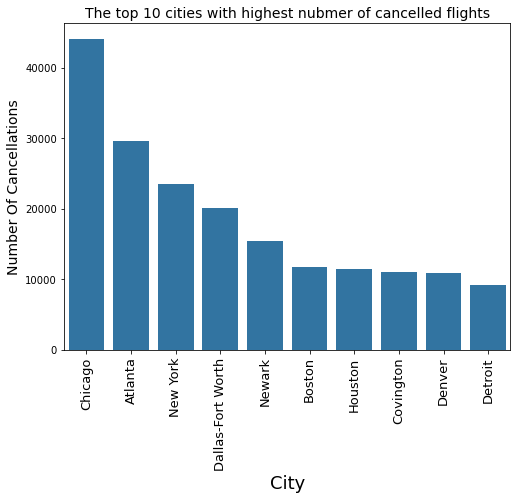

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(8,6))
sb.countplot(data = cancelled_flights,x = 'DestCity',order = order, color = base_color)
plt.xticks(rotation = 90,fontsize=13)
plt.title('The top 10 cities with highest nubmer of cancelled flights',fontsize=14)
plt.xlabel('City',fontsize=18)
plt.ylabel('Number Of Cancellations',fontsize=14)
plt.show()

In [6]:
delayed_flights = df[df['TotalDelay']>0]
delayed_cities = delayed_flights.groupby('DestCity').count()['TotalDelay'].sort_values(ascending = False)
top_delayed_citites= delayed_cities.head(10)
top_delayed_citites = top_delayed_citites.reset_index()
order =top_delayed_citites['DestCity']
order = list(order)
delayed_flights =delayed_flights[delayed_flights['DestCity'].isin(order)]

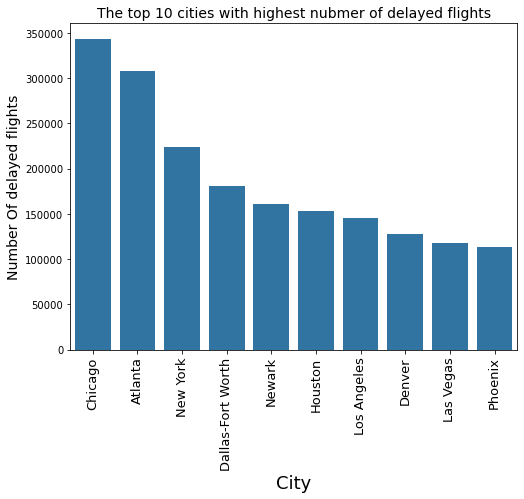

In [7]:
plt.figure(figsize=(8,6))
sb.countplot(data = delayed_flights,x = 'DestCity',order = order, color = base_color)
plt.xticks(rotation = 90,fontsize=13)
plt.title('The top 10 cities with highest nubmer of delayed flights',fontsize=14)
plt.xlabel('City',fontsize=18)
plt.ylabel('Number Of delayed flights',fontsize=14)
plt.show()

In [8]:
visited_df = df.groupby('DestCity').count()
vistied_cities = visited_df['Distance'].sort_values(ascending = False)
top_citites= vistied_cities.head(10)
top_citites = top_citites.reset_index()
order =top_citites['DestCity']
order = list(order)

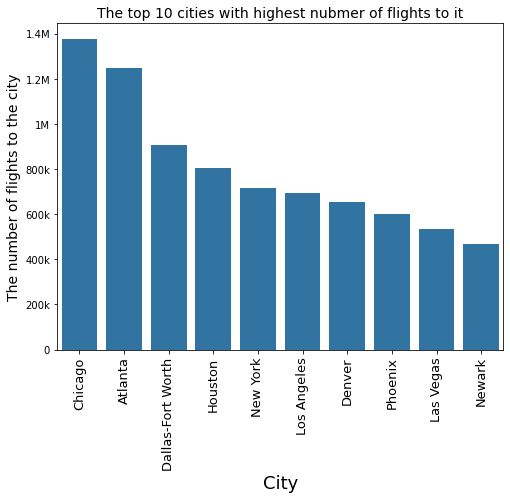

In [9]:
plt.figure(figsize=(8,6))
sb.countplot(data = df,x = 'DestCity',order = order, color = base_color)
plt.xticks(rotation = 90,fontsize=13)
plt.title('The top 10 cities with highest nubmer of flights to it',fontsize=14)
plt.xlabel('City',fontsize=18)
plt.ylabel('The number of flights to the city',fontsize=14)
y_ticks = np.arange(0,1.4e6+2e5,2e5)
y_tick_labels = ['0','200k','400k','600k','800k','1M','1.2M','1.4M']
plt.yticks(y_ticks,y_tick_labels)
plt.show()

## The Cancellation reasons for the Cancelled Flights.
the weather proplems is the most common problem of cancellation so now we can see the number of cancellation across the monthes of the year to see if the winter monthes have the highest number of cancellation flights due to its bad weather

In [10]:
my_data = cancelled_df['CancelReason'].value_counts()
my_labels = cancelled_df['CancelReason'].value_counts().index

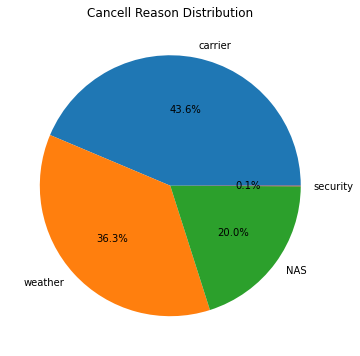

In [11]:
plt.figure(figsize = (8,6))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Cancell Reason Distribution')
plt.show()

In [12]:
cancelled_df=df[df['Cancelled']==True]
cancel_month=cancelled_df['Date'].dt.month_name().value_counts()

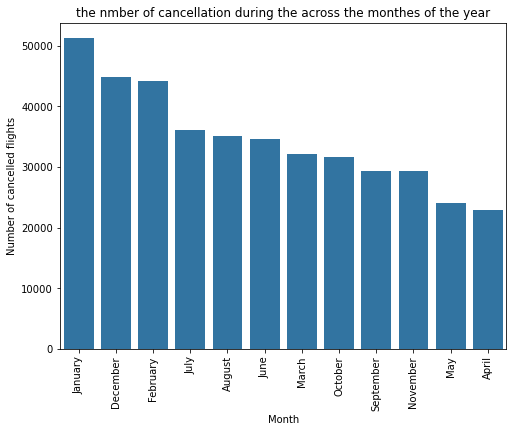

In [13]:
plt.figure(figsize = (8,6))
sb.barplot(x =cancel_month.index, y = cancel_month.values, color = base_color,order= cancel_month.index)
plt.title('the nmber of cancellation during the across the monthes of the year')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Number of cancelled flights')
plt.show()

## Top 10 cities with the highest flights cancellation ratio
Aspen has the highest ratio of cancelled flights due to weather problems as we saw that Weather played a big role in the cancelled fligths


In [14]:
cancelled_flights_df=df.groupby('DestCity').sum()
visited_df = df.groupby('DestCity').count()
cancelled_ratio = (cancelled_flights_df['Cancelled'] /visited_df['Cancelled']).sort_values(ascending = False)
cancelled_ratio = (cancelled_flights_df['Cancelled'] /visited_df['Cancelled']).sort_values(ascending = False)
cancelled_ratio = (cancelled_flights_df[visited_df['Cancelled']>1000]/visited_df[visited_df['Cancelled']>1000])['Cancelled'].sort_values(ascending =False)

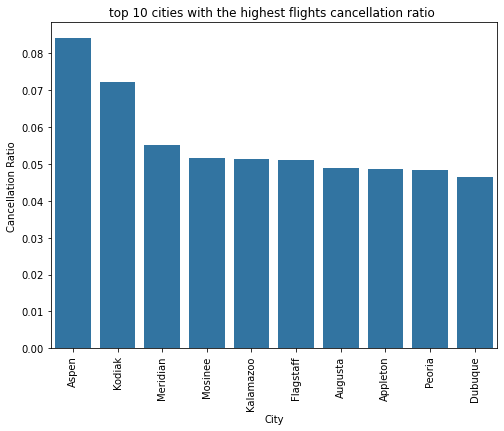

In [15]:
def cancel_ratio(): 
    plt.figure(figsize = (8,6))
    sb.barplot(x =cancelled_ratio.head(10).index, y = cancelled_ratio.head(10).values, color = base_color)
    plt.xticks(rotation = 90)
    plt.title('top 10 cities with the highest flights cancellation ratio ')
    plt.xlabel('City')
    plt.ylabel('Cancellation Ratio')
    plt.show()
cancel_ratio()

In [16]:
top_cancelled_df = cancelled_df[cancelled_df['DestCity'].isin(cancelled_ratio.head(10).index)]

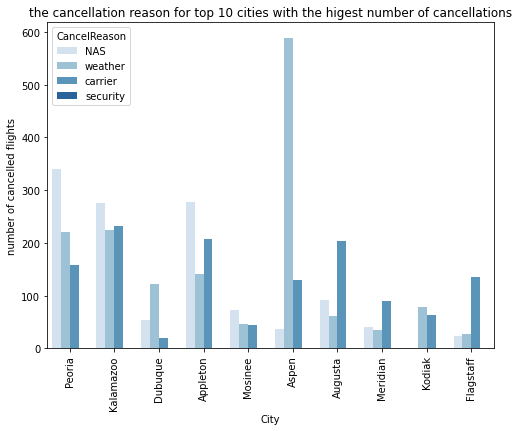

In [17]:

def cancel_reason():
    plt.figure(figsize = (8,6))
    sb.countplot(data = top_cancelled_df, x = 'DestCity', hue = 'CancelReason', palette = 'Blues')
    plt.xticks(rotation = 90)
    plt.title('the cancellation reason for top 10 cities with the higest number of cancellations')
    plt.xlabel('City')
    plt.ylabel('number of cancelled flights')
    plt.show()
cancel_reason()

## Origin City vs Destaination City
the number on-ward flights is almost equal to the number of  return flights. Also we can see that most number of flights is between New York and Chicago  also. they both are the only cities which have flights to them selfs (internal flights in the same city)

In [18]:
# let see the top six origin and destnation cities
top_cities = df['OriginCity'].value_counts().head(6).index.sort_values()
# first let's choose the flights between only the top 6 citites 
most_flights = df[(df['OriginCity'].isin(top_cities)) &(df['DestCity'].isin(top_cities)) ]
# now let's sort the cities acording to their names
most_flights= most_flights.groupby(['OriginCity','DestCity']).count().sort_values(by= ['OriginCity','DestCity'])['Distance'].reset_index()
most_flights.rename(columns ={'Distance':'NoOfFlights'},inplace= True)
# now let's fix the missed flights so if cities have no flights between itself so we simply put 0 in the number of the flights
mised_citties= most_flights['OriginCity'].value_counts()[(most_flights['OriginCity'].value_counts()<6)].index
for city in mised_citties:
    most_flights.loc[-1] = [city, city, 0]
    most_flights.index = most_flights.index + 1
# now we will resort the cities by their names to be able to reshape the data in the next step
# also we will fix the indexes just to keep our data clean along the way
most_flights = most_flights.sort_values(by= ['OriginCity','DestCity']).reset_index().drop('index',axis =1)
# now we have a dataframe with 36 value that sorted by the city name 
# so name we reshape the data into 6 group for each city
no_of_flights = np.array(most_flights['NoOfFlights']).reshape(6,6)

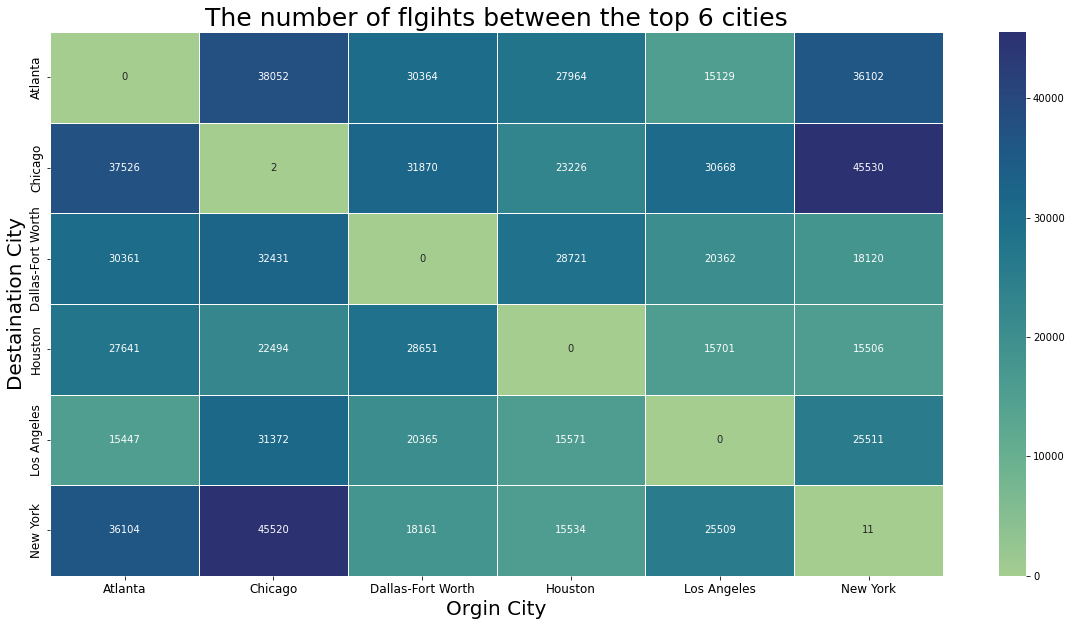

In [19]:
plt.figure(figsize = (20,10))
sb.heatmap(data = no_of_flights,annot=True,fmt=".0f",cmap="crest",linewidth=1)
plt.xticks(np.arange(0.5,6,1),top_cities,fontsize = '12')
plt.yticks(np.arange(0.5,6,1),top_cities,fontsize = '12')
plt.title('The number of flgihts between the top 6 cities',fontsize = '25')
plt.xlabel('Orgin City',fontsize = '20')
plt.ylabel('Destaination City',fontsize = '20')
plt.show()

## the Distance and the Actual Elapsed time and see the effect of both ArrDelay and DepDelay on the Elapsed time
there is a high correlation between the Distance and the actual elapsed time also we notice that most of delays have ouccured in the short distances also we can the the flights with high ariaval delay also tend to have high deprature dely. finally we can see the both the arrival delay and deprature delay barley affect the actual elapsed time

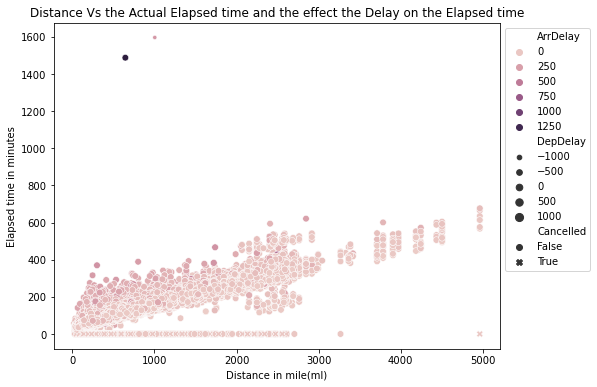

In [20]:
plt.figure(figsize = (8,6))
sb.scatterplot(data = df.sample(100000), x = 'Distance', y = 'ActualElapsedTime',hue ='ArrDelay' ,size='DepDelay',style = 'Cancelled')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Distance Vs the Actual Elapsed time and the effect the Delay on the Elapsed time')
plt.xlabel('Distance in mile(ml)')
plt.ylabel('Elapsed time in minutes')
plt.show()

## the realation between the Distance and the cancelled flights for the top 5 cities
most of cancelled flights for all cities occured in the short distaces more thant the long distances and that's maybe due to because the long distance flights have to be well prepared to face common problems that can can cancell the other flights

In [21]:
visited_df = df.groupby('DestCity').count()
vistied_cities = visited_df['Distance'].sort_values(ascending = False)
top_citites= vistied_cities.head(10)
top_citites = top_citites.reset_index()
top_dest_cities = df[df['DestCity'].isin(top_citites.head()['DestCity'])]

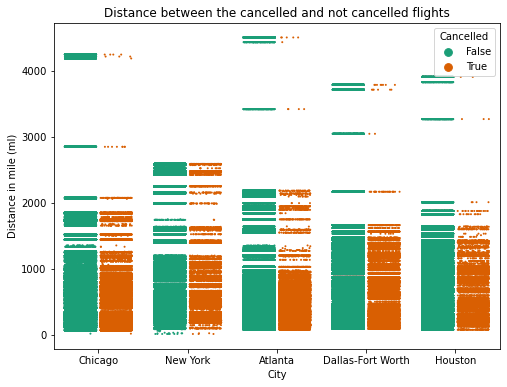

In [22]:
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = top_dest_cities, x = 'DestCity',y = 'Distance', hue = 'Cancelled',
                 palette = 'Dark2',size = 2 ,jitter = 0.35, dodge = True)
plt.title('Distance between the cancelled and not cancelled flights')
plt.xlabel('City')
plt.ylabel('Distance in mile (ml)')
plt.show()

In [ ]:
!jupyter nbconvert part2_On_Time_Performance_Data_Exploration.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
z